In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/bank-classification.csv', index_col=0)

In [3]:
df_train = df[df.y != 'unknown']
df_test = df[df.y == 'unknown']

In [4]:
df.head()

,birth_date,job,marital,education,default,housing,loan,contact_date,contact,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,
1,1952-03-23,housemaid,married,basic.4y,no,no,no,2008-05-12,telephone,1,999,0,nonexistent,no
2,1951-03-24,services,married,high.school,unknown,no,no,2008-05-26,telephone,1,999,0,nonexistent,unknown
3,1971-05-19,services,married,high.school,no,yes,no,2008-05-05,telephone,1,999,0,nonexistent,no
4,1968-01-24,admin.,married,basic.6y,no,no,no,2008-05-19,telephone,1,999,0,nonexistent,unknown
5,1952-05-11,services,married,high.school,no,no,yes,2008-05-19,telephone,1,999,0,nonexistent,unknown


In [5]:
df.iloc[1]

birth_date       1951-03-24
job                services
marital             married
education       high.school
default             unknown
housing                  no
loan                     no
contact_date     2008-05-26
contact           telephone
campaign                  1
pdays                   999
previous                  0
poutcome        nonexistent
y                   unknown
Name: 2, dtype: object

In [6]:
# df[:10].apply(lambda r: , axis=1)
categorical_cols = list(set(df.columns) - set(['birth_date', 'contact_date']))
# df['sum_nan'] = (df[['default', 'loan', 'education', 'housing', 'job']] == 'unknown').sum(axis=1)
# df['sum_0'] = (df[['out1','out2','out3']] == 0).sum(axis=1)

In [7]:
# df['sum_nan']

In [8]:
categorical_cols = set(df.columns) - set(['birth_date', 'contact_date']) 
for col in categorical_cols:
    print(col)
    print(df_train[col].value_counts())
    print(' ')

default
no         16408
unknown     4389
yes            2
Name: default, dtype: int64
 
education
university.degree      6192
high.school            4781
basic.9y               3016
professional.course    2592
basic.4y               2154
basic.6y               1170
unknown                 887
illiterate                7
Name: education, dtype: int64
 
loan
no         17122
yes         3187
unknown      490
Name: loan, dtype: int64
 
campaign
1     8864
2     5340
3     2711
4     1354
5      786
6      480
7      332
8      222
9      150
10     111
11      81
12      69
13      55
14      34
16      33
17      29
15      24
19      17
18      15
20      14
21      10
22      10
24      10
23      10
29       6
27       5
26       5
32       3
28       3
30       3
25       3
43       2
35       2
33       1
31       1
34       1
40       1
41       1
39       1
Name: campaign, dtype: int64
 
marital
married     12512
single       5896
divorced     2347
unknown        44
Name: marital

In [9]:
df_known = df[df.y != 'unknown']

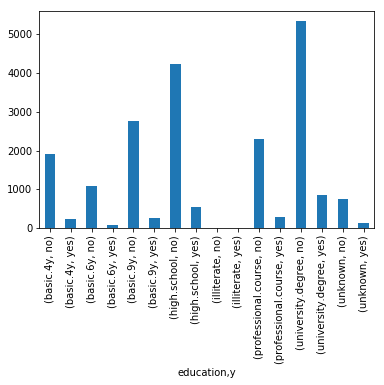

In [10]:
df_known.groupby(['education', 'y']).size().plot(kind='bar')
plt.show()

In [11]:
df_known.groupby(['education', 'y']).size()

education            y  
basic.4y             no     1919
                     yes     235
basic.6y             no     1081
                     yes      89
basic.9y             no     2766
                     yes     250
high.school          no     4242
                     yes     539
illiterate           no        6
                     yes       1
professional.course  no     2306
                     yes     286
university.degree    no     5341
                     yes     851
unknown              no      758
                     yes     129
dtype: int64

In [12]:
df_known.groupby(['education', 'y']).size().keys()

MultiIndex(levels=[['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'], ['no', 'yes']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['education', 'y'])

In [13]:
def print_ratios(column):
    counts = df_known.groupby([column, 'y']).size()

    ratios = {}
    for key in counts.keys().levels[0]:
        if (key, 'yes') in counts:
            ratios[key] = counts[key, 'yes'] / (counts[key, 'yes'] + counts[key, 'no'])
        else:
            ratios[key] = 0
    plt.bar(range(len(ratios)), ratios.values(), align='center')
    plt.xticks(range(len(ratios)), ratios.keys(), rotation=90)

    plt.show()

default


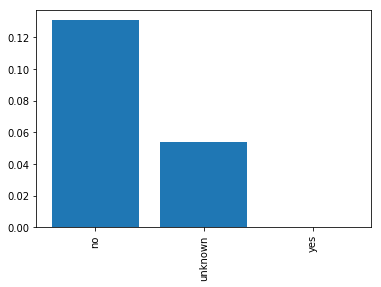

loan


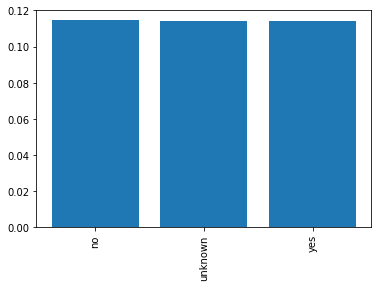

education


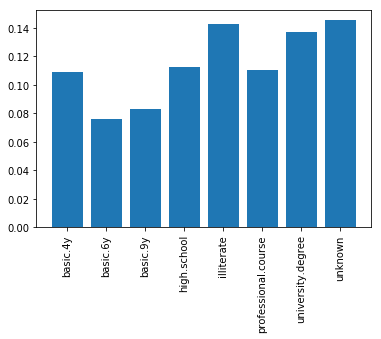

marital


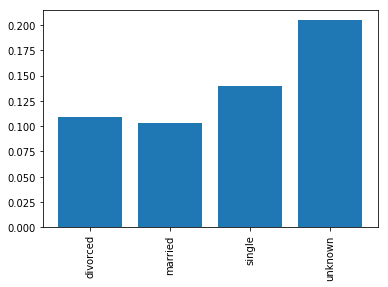

housing


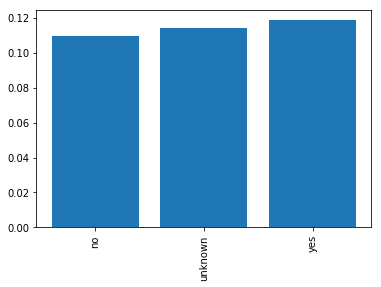

job


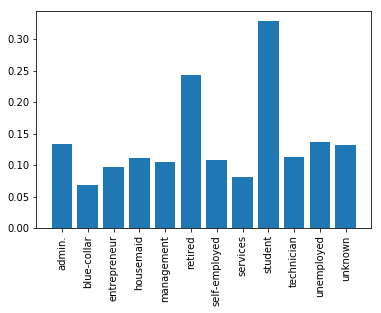

contact


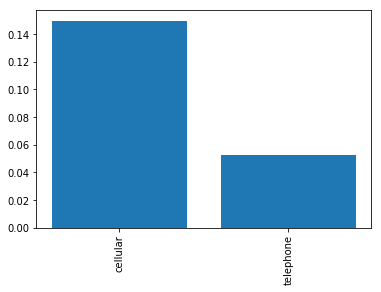

previous


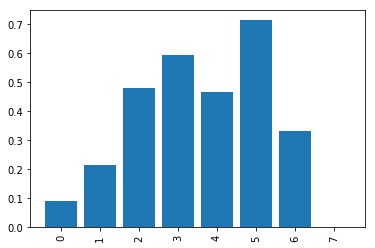

poutcome


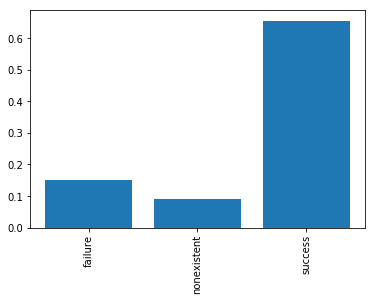

In [14]:
categorical_cols = list(set(df_known.columns) - 
                            set(['birth_date', 'contact_date', 'pdays', 'campaign', 'y','age', 'sum_nan']))
for col in categorical_cols:
    print(col)
    print_ratios(col)

In [15]:
counts = df_known.groupby(['previous', 'y']).size()
counts

previous  y  
0         no     16368
          yes     1615
1         no      1784
          yes      492
2         no       200
          yes      186
3         no        45
          yes       66
4         no        17
          yes       15
5         no         2
          yes        5
6         no         2
          yes        1
7         no         1
dtype: int64